In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
from qiskit.circuit.random import random_circuit
from qiskit.circuit import Parameter
from qiskit import IBMQ
from qiskit.compiler import transpile
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer

In [5]:
IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q')


ibmqfactory.load_account:WARNING:2021-01-11 19:32:54,711: Credentials are already in use. The existing account in the session will be replaced.


In [6]:
n = 3 #number of qubits

In [7]:
def superpos(qc,qr):
    for q in qr:
        qc.h(q)

In [8]:
qreg_q = QuantumRegister(n, 'q')
creg_c = ClassicalRegister(n, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
paras = [Parameter('p'+str(i)) for i in range(n)]

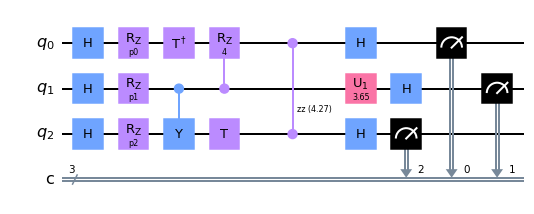

In [9]:
superpos(circuit,qreg_q)
for p in paras:
    circuit.rz(p,int(p.name[1:]))
algorithm = random_circuit(n,n)
circuit += algorithm
superpos(circuit,qreg_q)
circuit.measure(qreg_q,creg_c)
circuit.draw(output='mpl')

In [10]:
circuit_fixed = circuit.bind_parameters({p : np.pi * np.random.uniform(0, 2) for p in paras})
# note : compilation before binding has a better runtime

In [11]:
# transpile the circuit for backend chip
circuit_transpiled = transpile(circuit, backend=provider.get_backend('ibmq_16_melbourne'), optimization_level=3)

print('gates = ', circuit_transpiled.count_ops())
print('depth = ', circuit_transpiled.depth())

gates =  OrderedDict([('rz', 20), ('cx', 8), ('sx', 6), ('measure', 3), ('barrier', 1)])
depth =  19


In [12]:
# use appropriate optimization level

for opt_lvl in range(4):
    circuit_transpiled = transpile(circuit, backend=provider.get_backend('ibmq_santiago'), optimization_level=opt_lvl)
    print("optimization level ",opt_lvl)
    print('gates = ', circuit_transpiled.count_ops())
    print('depth = ', circuit_transpiled.depth())


optimization level  0
gates =  OrderedDict([('rz', 43), ('sx', 26), ('cx', 8), ('measure', 3), ('barrier', 1)])
depth =  37
optimization level  1
gates =  OrderedDict([('rz', 20), ('sx', 6), ('cx', 6), ('measure', 3), ('barrier', 1)])
depth =  17
optimization level  2
gates =  OrderedDict([('rz', 20), ('sx', 6), ('cx', 6), ('measure', 3), ('barrier', 1)])
depth =  17
optimization level  3
gates =  OrderedDict([('rz', 20), ('cx', 8), ('sx', 6), ('measure', 3), ('barrier', 1)])
depth =  19


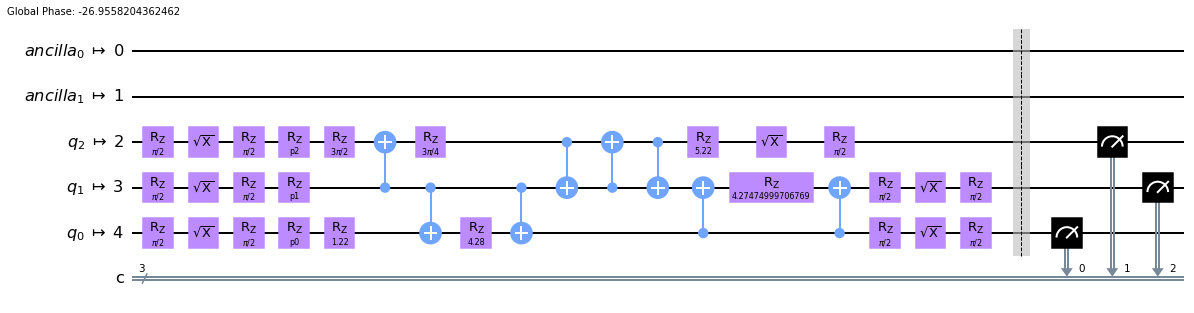

In [13]:
circuit_transpiled.draw(output = 'mpl')

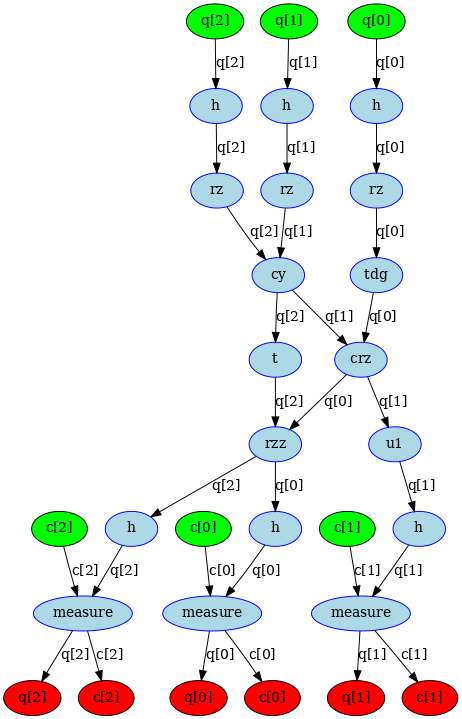

In [16]:
dag = circuit_to_dag(circuit)
dag_drawer(dag)